<a href="https://colab.research.google.com/github/Eric-Chung-0511/Learning-Record/blob/main/General%20Helpers/Examples/Natural_Language_Processing_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-04 12:15:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-04 12:15:22 (140 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-06-04 12:15:30--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2024-06-04 12:15:30 (105 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df['text'][2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [7]:
# shuffle all training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each classes
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [10]:
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# visualize some random samples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[['text', 'target']][random_index: random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real_disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 0 (not real disaster)
Text:
Why did God order obliteration of ancient Canaanites? http://t.co/Sf2vwQvJYa

---

Target: 0 (not real disaster)
Text:
Finnish ministers: Fennovoima nuclear reactor will go ahead http://t.co/mqMCOLwBzc

---

Target: 1 (real_disaster)
Text:
'It looks like a mudslide' poor thing! ?? #greatbritishbakeoff

---

Target: 1 (real_disaster)
Text:
Criminals Who Hijack Lorries And Buses Arrested In Enugu (PHOTO) @DONJAZZY @PoliceNG #HumanRights  https://t.co/XyFl8wy62g

---

Target: 1 (real_disaster)
Text:
The Catastrophic Effects of Hiroshima and Nagasaki Atomic Bombings Still Being Felt Today http://t.co/oU1M9chznq

---



## Split into training and validation datasets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# train_test_split expected numpy array
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1, random_state=42)

In [14]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [15]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

In [16]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [17]:
# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize='lower_and_strip_punctuation', # how to process text
                                    split='whitespace',
                                    ngrams=None, # create group of n-words
                                    output_mode='int', # how to map tokens to number
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                 #  pad_to_max_tokens=True)  # pad_to_max_tokens=True) # Not valid if using max_tokens=None


In [18]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [19]:
len(train_sentences[0].split())

7

In [20]:
round(sum([len(i.split()) for i in train_sentences]))

102087

In [21]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [22]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary, get most 10000 common words
max_length = 15 # max length our sequences will be (how many words from a Tweet does a model see)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [23]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [24]:
# Create a sample sentences and tokenize it
sample_sentence = 'There is a flood in my street!'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [25]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'Original text:\n {random_sentence}\
        \n\nVectorized version:')

text_vectorizer([random_sentence])

Original text:
 @Camilla_33 @CrayKain Hate to shatter your delusions but a hatchet is a deadly weapon justifying lethal force. #gunsense        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,    1,  891,    5, 8587,   33,    1,   30,    3, 3784,    9,
           3, 1690,  263, 5294]])>

In [26]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in training data
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'5 most common words: {top_5_words}')
print(f'5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using an Embedding Layer

* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [27]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # output shape
                             input_length=max_length) # how long is each input

embedding

In [28]:
# Get a random sentences from the training set
random_sentence = random.choice(train_sentences)
print(f'Original text:\n {random_sentence}\
        \n\nEmnedded version:')

# Embed the random sentence (turn it into dense vector)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 Myanmar floods: Childfund https://t.co/pQHQ4JnZTT
 and International Needs https://t.co/FX0W2Sq05F and CARE Aust @CAREemergencies appeals        

Emnedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02293168, -0.02734641, -0.00581037, ..., -0.00586291,
         -0.04490268, -0.02923707],
        [ 0.01167943,  0.04084984, -0.00188676, ..., -0.01791419,
          0.00364036, -0.039309  ],
        [ 0.02616748,  0.03955791, -0.01650006, ..., -0.01399094,
         -0.04039999, -0.04544147],
        ...,
        [ 0.02616748,  0.03955791, -0.01650006, ..., -0.01399094,
         -0.04039999, -0.04544147],
        [ 0.01091883, -0.04755592,  0.04228652, ..., -0.0195779 ,
         -0.02350137, -0.01108987],
        [ 0.01091883, -0.04755592,  0.04228652, ..., -0.0195779 ,
         -0.02350137, -0.01108987]]], dtype=float32)>

In [29]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02293168, -0.02734641, -0.00581037, -0.02810946, -0.01777252,
         0.03965345, -0.03798804, -0.03778594,  0.0212766 ,  0.04159014,
        -0.04541516,  0.01618835,  0.01859066,  0.04508865, -0.02506815,
         0.00766938, -0.04709933,  0.02829576,  0.02471776, -0.00578326,
         0.01681144,  0.0382158 , -0.03631259,  0.00658101, -0.0300244 ,
        -0.02818519, -0.02604651, -0.01931636, -0.00609751, -0.03499342,
         0.02898203, -0.03351092, -0.03432261, -0.03934737,  0.01758964,
        -0.00818165, -0.00310367,  0.0148363 ,  0.00052239, -0.01483935,
         0.02421006, -0.04476261, -0.04772465, -0.03595876,  0.00599451,
         0.0313297 ,  0.04829898, -0.00913006, -0.02350509,  0.00842159,
         0.04526678,  0.04722753, -0.00191201, -0.00052608,  0.01710418,
        -0.02468541, -0.02236344, -0.02994417,  0.00505273, -0.03831316,
        -0.0308155 , -0.02085644,  0.00661297,  0.00353033, -0.03805109,
  

## Modelling a text dataset

* **Model 0:** Naive Bayes (baseline)
* **Model 1:** Feed-forward neural network (dense model)
* **Model 2:** LSTM model
* **Model 3:** GRU model
* **Model 4:** Bidirectional-LSTM model
* **Model 5:** 1D Convolutional Neural Network
* **Model 6:** TensorFlow Hub Pretrained Feature Extractor
* **Model 7:** Same as model 6 with 10% of training data

### Model 0: Naive Bayes (baseline)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [31]:
# Create tokenization and modelling pipeline
model_0 = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
# Evaluate our baseline_model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'The baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

The baseline model achieves an accuracy of: 79.27%


In [33]:
# Make predictions, val_sentences stands for X_test
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [34]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

### `average` Parameter description

- `average=None`:
  - Returns the precision, recall, and F1 score for each class, rather than a single average value.
  - 返回每個類別的精確度、召回率和 F1 分數，而不是總的平均值。

- `average='micro'`:
  - Calculates metrics globally by counting the total true positives, false negatives, and false positives.
  - 全局計算指標，將所有類別的 TP、FP、FN 加起來再計算精確度、召回率和 F1 分數。

- `average='macro'`:
  - Calculates metrics for each label, and finds their unweighted mean. This does not take label imbalance into account.
  - 不考慮每個類別的支持數量，對每個類別分別計算指標，再取平均值。

- `average='weighted'`:
  - Calculates metrics for each label, and finds their average, weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance.
  - 根據每個類別的支持數量加權平均這些指標，這樣能夠反映數據集中不同類別的樣本數量不平衡的情況。

- `average='samples'`:
  - Calculates metrics for each instance, and finds their average (mainly used for multi-label classification).
  - 計算每個樣本的指標，然後取平均值（主要用於多標籤分類）。


In [35]:
# Create function to evaluate models, the _ stands for 'support'
def calculate_results(y_true, y_pred):


  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_accuracy = round(model_accuracy * 100, 2)
  model_precision = round(model_precision * 100, 2)
  model_recall = round(model_recall * 100, 2)
  model_f1_score = round(model_f1_score * 100, 2)

  model_results = {'accuracy': f'{model_accuracy}%',
                   'precision': f'{model_precision}%',
                   'recall': f'{model_recall}%',
                   'f1_score': f'{model_f1_score}%'}

  return model_results

In [36]:
# get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': '79.27%',
 'precision': '81.11%',
 'recall': '79.27%',
 'f1_score': '78.62%'}

### Model 1: Feed-forward neural network (dense model)

In [37]:
# Create a directory to save tensorboard logs
SAVE_DIR = 'model_logs'

In [38]:
from tensorflow.keras import layers, models, Sequential, Input
from tensorflow.keras.layers import Dense, Activation, GlobalAveragePooling1D
from tensorflow.keras.models import Model

In [39]:
# Build model with Functional API
inputs = Input(shape=(1,), dtype='string') # inputs are 1 dimension strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x)
x = GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = Dense(1, activation='sigmoid')(x) # output layer
model_1 = Model(inputs, outputs, name='model_1_dense')

In [40]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [41]:
# compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train_sentences(X_train), train_labels(y_train), val_sentences(X_test), val_labels(y_test)
model_1_history = model_1.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20240604-121540
Epoch 1/5
215/215 [==============================] - 19s 68ms/step - loss: 0.6159 - accuracy: 0.6913 - val_loss: 0.5394 - val_accuracy: 0.7480
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4442 - accuracy: 0.8196 - val_loss: 0.4708 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3484 - accuracy: 0.8612 - val_loss: 0.4620 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2860 - accuracy: 0.8888 - val_loss: 0.4644 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2395 - accuracy: 0.9111 - val_loss: 0.4789 - val_accuracy: 0.7848


In [42]:
# check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7848


[0.47890105843544006, 0.7847769260406494]

In [43]:
# make some prediction and evaluate
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [44]:
model_1_pred_probs[:10]

array([[0.396468  ],
       [0.8129871 ],
       [0.99772674],
       [0.15978801],
       [0.12447806],
       [0.93837786],
       [0.9123647 ],
       [0.99321294],
       [0.9665936 ],
       [0.31603196]], dtype=float32)

In [45]:
# convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [46]:
# calculate model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)

model_1_results

{'accuracy': '78.48%',
 'precision': '78.88%',
 'recall': '78.48%',
 'f1_score': '78.2%'}

* `values()`: 是字典的方法，用於返回字典中所有值的視圖。
* `value`: 是一個普通的變量或屬性名稱，不能從字典中提取值。

In [47]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualized the Embedding

In [48]:
# Get the vocabulary from the next vectoriztion layer, most common words
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [49]:
# model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [50]:
# get the weight metrix of embedding layer
embed_weights = model_1.get_layer('embedding').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [51]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
#import io

# Create output writers
#out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
#out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
#for num, word in enumerate(words_in_vocab):
    #if num == 0:
        #continue # skip padding token
    #vec = embed_weights[num]
    #out_m.write(word + "\n") # write words to file
    #out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file

#out_v.close()
#out_m.close()

# Download files locally to upload to Embedding Projector
#try:
    #from google.colab import files
#except ImportError:
    #pass
#else:
    #files.download("embedding_vectors.tsv")
    #files.download("embedding_metadata.tsv")

###Model 2: LSTM model

The structure of an RNN look like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [52]:
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Embedding

In [53]:
# set new embedding layer and create LSTM model
model_2_embedding = Embedding(input_dim=max_vocab_length,
                              output_dim=128,
                              embeddings_initializer='uniform',
                              input_length=max_length,
                              name='embedding_2')


inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = LSTM(64, return_sequences=True)(x)
x = LSTM(64)(x)
x = Dense(64, activation='tanh')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_2 = Model(inputs, outputs, name='model_2_LSTM')

In [54]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_2_history = model_2.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'LSTM')])

Saving TensorBoard log files to: model_logs/LSTM/20240604-121625
Epoch 1/5
215/215 [==============================] - 14s 41ms/step - loss: 0.5029 - accuracy: 0.7517 - val_loss: 0.4583 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3163 - accuracy: 0.8685 - val_loss: 0.4853 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2189 - accuracy: 0.9202 - val_loss: 0.6638 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1578 - accuracy: 0.9426 - val_loss: 0.7100 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1120 - accuracy: 0.9607 - val_loss: 0.9584 - val_accuracy: 0.7690


In [55]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [56]:
# Make prediction on validation data
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


((762, 1),
 array([[0.8514541 ],
        [0.4813371 ],
        [0.9998338 ],
        [0.01518825],
        [0.00189366],
        [0.99990785],
        [0.97004247],
        [0.9999099 ],
        [0.9999256 ],
        [0.0822518 ]], dtype=float32))

In [57]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [58]:
# calculate LSTM model results
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': '76.9%',
 'precision': '76.96%',
 'recall': '76.9%',
 'f1_score': '76.75%'}

### Model 3: GRU

In [59]:
from tensorflow.keras.layers import GRU

In [60]:
model_3_embedding = Embedding(input_dim=max_vocab_length,
                              output_dim=128,
                              embeddings_initializer='uniform',
                              input_length=max_length,
                              name='embedding_3')

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = GRU(64, return_sequences=True)(x) # GRU layer, can add more
x = GRU(64)(x)
x = Dense(64, activation='tanh')(x) # full connected layer, can add more
outputs = Dense(1, activation='sigmoid')(x)
model_3 = Model(inputs, outputs, name='model_3_GRU')

In [61]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_3_history = model_3.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'GRU')])

Saving TensorBoard log files to: model_logs/GRU/20240604-121650
Epoch 1/5
215/215 [==============================] - 13s 38ms/step - loss: 0.5106 - accuracy: 0.7468 - val_loss: 0.4604 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3176 - accuracy: 0.8699 - val_loss: 0.5409 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2190 - accuracy: 0.9193 - val_loss: 0.5849 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1615 - accuracy: 0.9448 - val_loss: 0.7078 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1163 - accuracy: 0.9623 - val_loss: 0.7615 - val_accuracy: 0.7585


In [62]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                       

In [63]:
# Make prediction on validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


((762, 1),
 array([[0.17049494],
        [0.8256164 ],
        [0.9973047 ],
        [0.01569198],
        [0.00378906],
        [0.99502546],
        [0.7556861 ],
        [0.9978636 ],
        [0.9958864 ],
        [0.1449968 ]], dtype=float32))

In [64]:
# Round out predictions and reduce to 1-dimensional array
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
# calculate GRU model results
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': '75.85%',
 'precision': '76.3%',
 'recall': '75.85%',
 'f1_score': '75.48%'}

### Model 4: Bidirectional RNN

* goes from left to right and right to left



In [66]:
from tensorflow.keras.layers import Bidirectional

In [67]:
# Using LSTM to the bidirectional RNN, you can use GRU btw
model_4_embedding = Embedding(input_dim=max_vocab_length,
                              output_dim=128,
                              embeddings_initializer='uniform',
                              input_length=max_length,
                              name='embedding_4')

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
x = Dense(64, activation='tanh')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_4 = Model(inputs, outputs, name='model_4_bidirectional')

In [68]:
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_4_history = model_4.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'bidirectional(LSTM)')])

Saving TensorBoard log files to: model_logs/bidirectional(LSTM)/20240604-121716
Epoch 1/5
215/215 [==============================] - 20s 49ms/step - loss: 0.5087 - accuracy: 0.7533 - val_loss: 0.4607 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3111 - accuracy: 0.8745 - val_loss: 0.4801 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2040 - accuracy: 0.9285 - val_loss: 0.5844 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1395 - accuracy: 0.9543 - val_loss: 0.6246 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1002 - accuracy: 0.9669 - val_loss: 0.7199 - val_accuracy: 0.7690


In [69]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                             

In [70]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs.shape, model_4_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


((762, 1),
 array([[0.01346178],
        [0.951958  ],
        [0.99921787],
        [0.08618653],
        [0.01862177],
        [0.9978459 ],
        [0.6256404 ],
        [0.999461  ],
        [0.99879575],
        [0.0584505 ]], dtype=float32))

In [71]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [72]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': '76.9%',
 'precision': '77.49%',
 'recall': '76.9%',
 'f1_score': '76.51%'}

### Model 5: 1D Convolutional Neural Network

```
Inputs (text) -> Tokenization -> Embedding -> Layers (Conv1D + Pooling) -> Outputs (class probabilities)
```

In [73]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [74]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

In [75]:
model_5_embedding = Embedding(input_dim=max_vocab_length,
                              output_dim=128,
                              embeddings_initializer='uniform',
                              input_length=max_length,
                              name='embedding_5')

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_5 = Model(inputs, outputs, name='model_5_Conv1D')

In [76]:
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_5_history = model_5.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'Conv1D')])

Saving TensorBoard log files to: model_logs/Conv1D/20240604-121806
Epoch 1/5
215/215 [==============================] - 10s 38ms/step - loss: 0.5475 - accuracy: 0.7244 - val_loss: 0.4584 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3130 - accuracy: 0.8771 - val_loss: 0.4935 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1662 - accuracy: 0.9457 - val_loss: 0.5694 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1069 - accuracy: 0.9683 - val_loss: 0.6327 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0830 - accuracy: 0.9747 - val_loss: 0.6817 - val_accuracy: 0.7730


In [77]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_7 (Dense)             (None, 64)             

In [78]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs.shape, model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


((762, 1),
 array([[0.04690561],
        [0.7956511 ],
        [0.9973786 ],
        [0.03988054],
        [0.01238299],
        [0.95108634],
        [0.40525952],
        [0.9948426 ],
        [0.9992481 ],
        [0.05729021]], dtype=float32))

In [79]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [80]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': '77.3%',
 'precision': '78.25%',
 'recall': '77.3%',
 'f1_score': '76.79%'}

### Model 6: Using Pretrained Embeddings (transfer learning for NLP)

* It's a transfer learning skill

In [81]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4') # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      'When you call the universal sentence encoder on a sentence, it turns it into numbers.'])

# the first 50 of 512
print(embed_samples[0][:50])

tf.Tensor(
[-0.01602836  0.01068853  0.02425464 -0.01405768  0.01434428  0.08292627
  0.01963369  0.06160139 -0.00352701 -0.01216414  0.00978648 -0.01248499
  0.01232348  0.09748451  0.06141112 -0.03728352  0.01860887 -0.04669851
  0.00413913 -0.06363908 -0.02469897  0.02713692  0.02284444 -0.00210027
 -0.00630591 -0.0396496   0.02220407  0.00115075 -0.03132181  0.00119527
 -0.0401255   0.04561895 -0.01530597 -0.00175914  0.02173133 -0.08450424
  0.03340027  0.04604555 -0.0248025  -0.08681662  0.00702696 -0.00770477
 -0.01434537  0.07814164 -0.10676058 -0.05152997 -0.00858159 -0.03232228
 -0.03871096  0.02581471], shape=(50,), dtype=float32)


In [82]:
embed_samples[0].shape

TensorShape([512])

In [83]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

In [84]:
# Use Sequential API
from tensorflow.keras.models import Sequential

In [85]:
model_6 = Sequential()
model_6.add(sentence_encoder_layer)
model_6.add(Dense(128, activation='relu'))
model_6.add(Dense(1, activation='sigmoid', name='model_6_USE'))

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_6_history = model_6.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240604-121855
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.4883 - accuracy: 0.7875 - val_loss: 0.4444 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4083 - accuracy: 0.8175 - val_loss: 0.4350 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3939 - accuracy: 0.8257 - val_loss: 0.4287 - val_accuracy: 0.8202
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3842 - accuracy: 0.8320 - val_loss: 0.4271 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3741 - accuracy: 0.8374 - val_loss: 0.4228 - val_accuracy: 0.8163


In [86]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 model_6_USE (Dense)         (None, 1)                 129       
                                                                 
Total params: 256863617 (979.86 MB)
Trainable params: 65793 (257.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [87]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs.shape, model_6_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


((762, 1),
 array([[0.21673237],
        [0.7730038 ],
        [0.9925633 ],
        [0.21927828],
        [0.72173864],
        [0.7570843 ],
        [0.9875201 ],
        [0.9821982 ],
        [0.948621  ],
        [0.11252318]], dtype=float32))

In [88]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
# looks like it's the best until now
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': '81.63%',
 'precision': '81.79%',
 'recall': '81.63%',
 'f1_score': '81.5%'}

### Model 7: TF Hub Pretrained USE but with 10% of training data

* **To see how the model performs on a smaller data, replicate `model_6` except only train 10% of the data**

In [90]:
# Note: Making data split like this will cause data leakage
# Do not make data split whick leak data from validation/test set into training set
# Create subset of 10% of the training data
# train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)

# turn into list will be greater to let machine learning, otherwise it's dataframe
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [91]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [92]:
print(len(train_sentences_90_percent), len(train_labels_90_percent))
print(len(train_sentences_10_percent), len(train_labels_10_percent))

6165 6165
686 686


In [93]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [94]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
Name: count, dtype: int64

In [95]:
# Use model_6 to fit 10% of data
from tensorflow.keras.models import clone_model
model_7 = clone_model(model_6)

# compile
model_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the data
model_7_history = model_7.fit(train_sentences_10_percent, train_labels_10_percent, epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, '10_percent_tf_hub_sentence_encoder_correct_split')])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder_correct_split/20240604-121923
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6592 - accuracy: 0.7172 - val_loss: 0.6288 - val_accuracy: 0.7257
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5604 - accuracy: 0.8134 - val_loss: 0.5572 - val_accuracy: 0.7559
Epoch 3/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4709 - accuracy: 0.8207 - val_loss: 0.5065 - val_accuracy: 0.7730
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4102 - accuracy: 0.8367 - val_loss: 0.4872 - val_accuracy: 0.7874
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.3703 - accuracy: 0.8513 - val_loss: 0.4811 - val_accuracy: 0.7808


In [96]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs.shape, model_7_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


((762, 1),
 array([[0.19443603],
        [0.83398026],
        [0.944302  ],
        [0.27733183],
        [0.5101715 ],
        [0.86900806],
        [0.86692214],
        [0.8803427 ],
        [0.8576627 ],
        [0.09525821]], dtype=float32))

In [97]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [98]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': '78.08%',
 'precision': '78.71%',
 'recall': '78.08%',
 'f1_score': '77.72%'}

## Comparing the performance of all models

In [99]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1_score
baseline,79.27%,81.11%,79.27%,78.62%
simple_dense,78.48%,78.88%,78.48%,78.2%
lstm,76.9%,76.96%,76.9%,76.75%
gru,75.85%,76.3%,75.85%,75.48%
bidirectional,76.9%,77.49%,76.9%,76.51%
conv1d,77.3%,78.25%,77.3%,76.79%
tf_hub_sentence_encoder,81.63%,81.79%,81.63%,81.5%
tf_hub_10_percent_data,78.08%,78.71%,78.08%,77.72%


In [100]:
print(type(baseline_results))

<class 'dict'>


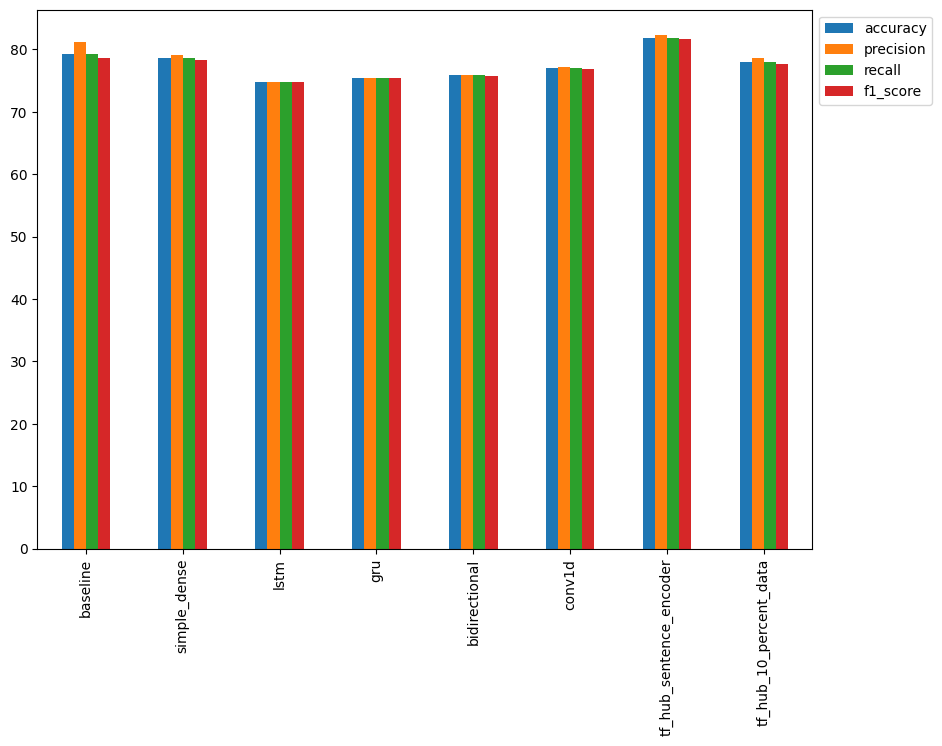

In [101]:
# It's dictionary format, it cannot plot
import pandas as pd
import matplotlib.pyplot as plt

baseline_results = {"accuracy": "79.27%", "precision": "81.11%", "recall": "79.27%", "f1_score": "78.62%"}
model_1_results = {"accuracy": "78.61%", "precision": "79.12%", "recall": "78.61%", "f1_score": "78.3%"}
model_2_results = {"accuracy": "74.8%", "precision": "74.75%", "recall": "74.8%", "f1_score": "74.74%"}
model_3_results = {"accuracy": "75.46%", "precision": "75.44%", "recall": "75.46%", "f1_score": "75.34%"}
model_4_results = {"accuracy": "75.85%", "precision": "75.89%", "recall": "75.85%", "f1_score": "75.7%"}
model_5_results = {"accuracy": "77.03%", "precision": "77.14%", "recall": "77.03%", "f1_score": "76.86%"}
model_6_results = {"accuracy": "81.89%", "precision": "82.25%", "recall": "81.89%", "f1_score": "81.7%"}
model_7_results = {"accuracy": "77.95%", "precision": "78.59%", "recall": "77.95%", "f1_score": "77.58%"}

all_model_results = pd.DataFrame({
    "baseline": baseline_results,
    "simple_dense": model_1_results,
    "lstm": model_2_results,
    "gru": model_3_results,
    "bidirectional": model_4_results,
    "conv1d": model_5_results,
    "tf_hub_sentence_encoder": model_6_results,
    "tf_hub_10_percent_data": model_7_results})

all_model_results = all_model_results.transpose()

# remove % and turn into float
def convert_to_float(value):
    return float(value.strip('%'))

# map to all dataframe
all_model_results = all_model_results.applymap(convert_to_float)

all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1, 1))
plt.show()

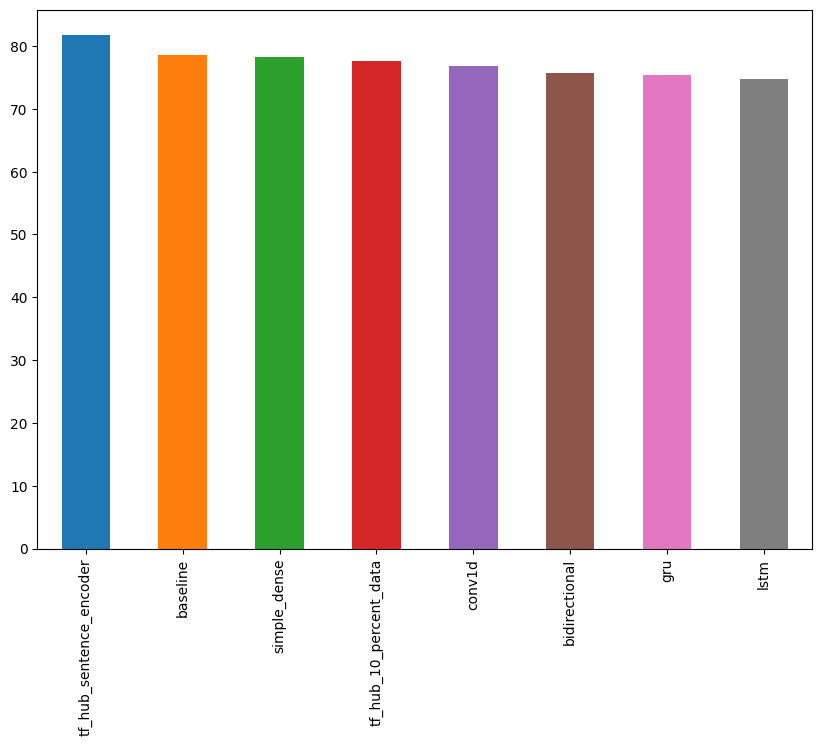

In [102]:
# Sort model results by f1 score
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
all_model_results.sort_values('f1_score', ascending=False)['f1_score'].plot(kind='bar', figsize=(10, 7), color=colors)
plt.show()

## Save the model and load the model

In [103]:
# Save model_6 (best) to HDF5 format
model_6.save('model_6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
# loaded model_6 back
# when loading HDF5 format, need to load with custo, hub layer
from tensorflow.keras.models import load_model
loaded_model_6 = load_model('model_6.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [105]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4228 - accuracy: 0.8163


[0.4227767884731293, 0.8162729740142822]

## Finding the most wrong examples

In [106]:
# Create DataFrame with validation sentences
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': model_6_preds,
                       'pred_prob': tf.squeeze(model_6_pred_probs)})

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.216732
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.773004
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.992563
3,@camilacabello97 Internally and externally scr...,1,0.0,0.219278
4,Radiation emergency #preparedness starts with ...,1,1.0,0.721739


In [107]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong[:10] # False positive

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.925546
628,@noah_anyname That's where the concentration c...,0,1.0,0.902415
759,FedEx will no longer transport bioterror patho...,0,1.0,0.881908
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.858728
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.852471
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.834150
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.815472
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.811376
474,My phone looks like it was in a car ship airpl...,0,1.0,0.809179
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.793883


In [108]:
most_wrong[-10:] # False negative

,text,target,pred,pred_prob
198,Perspectives on the Grateful Dead: Critical Wr...,1,0.0,0.068363
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.061293
221,going to redo my nails and watch behind the sc...,1,0.0,0.060215
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.055670
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.054907
486,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...,1,0.0,0.051620
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.050418
233,I get to smoke my shit in peace,1,0.0,0.048132
38,Why are you deluged with low self-image? Take ...,1,0.0,0.034816
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.033977


### `0` = not disaster, `1` = disaster

In [109]:
# check false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text:\n{text}\n')
  print('----\n')

Target: 0, Pred: 1.0, Prob: 0.9255456328392029
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.9024152159690857
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8819080591201782
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8587278723716736
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1.0, Prob: 0.8524709939956665
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1.0, Prob: 0.834149956703186
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1.0, Prob

In [110]:
# Check False negative
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text:\n{text}\n')
  print('----\n')

Target: 1, Pred: 0.0, Prob: 0.06836315244436264
Text:
Perspectives on the Grateful Dead: Critical Writings (Contributions to the Study http://t.co/fmu0fnuMxf http://t.co/AgGRyhVXKr

----

Target: 1, Pred: 0.0, Prob: 0.061292655766010284
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.060215286910533905
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.055670179426670074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.05490666255354881
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05162007361650467
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0.0, Prob: 0.050417814

## Making predictions on the datasets

In [111]:
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)

for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f'Pred: {int(pred)}, Prob: {pred_prob}')
  print(f'Text:\n{test_sample}\n')
  print('----\n')

1/1 [==============================] - 0s 50ms/step
Pred: 0, Prob: 0.034287769347429276
Text:
100  1' MIX NEW FLAT DOUBLE SIDED LINERLESS BOTTLE CAPS YOU CHOOSE MIX FLATTENED - Full reÛ_ http://t.co/61fALvOCuK http://t.co/1MuTpFcgDL

----

1/1 [==============================] - 0s 48ms/step
Pred: 0, Prob: 0.14230307936668396
Text:
The most prescient part of Tropic Thunder was that fat-suit fart comedies would use the 2.40:1 aspect ratio.

----

1/1 [==============================] - 0s 52ms/step
Pred: 0, Prob: 0.04873288795351982
Text:
Vanessa was about to explode! This is what she wanted to say to Shelli. Their alliance will survive. #BB17 #BBLF http://t.co/rypGKScHng

----

1/1 [==============================] - 0s 49ms/step
Pred: 0, Prob: 0.05369819700717926
Text:
My boy @Fall_off_Cliff still got it man rumor has it he going back to DE ??

----

1/1 [==============================] - 0s 49ms/step
Pred: 0, Prob: 0.12222493439912796
Text:
The only reason why player's now have an ego 